In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, regularizers

In [2]:
#git clone https://github.com/luisdiaz1997/DataScienceCourse

In [3]:
#cd DataScienceCourse

In [4]:
files = glob.glob('datasets/*monkey*/**/*jpg', recursive = True)

In [5]:
files[0].split('/')[3:]

['training', 'n0', 'n0038.jpg']

In [6]:
df = pd.DataFrame(data = np.array([file.split('/')[3:-1] for file in files], dtype = str), columns = ['train_type', 'label'])
df['path'] = files
df['label'] = pd.Categorical(df.label)

In [7]:
df.head()

,train_type,label,path
0,training,n0,datasets/10-monkey-species/training/training/n...
1,training,n0,datasets/10-monkey-species/training/training/n...
2,training,n0,datasets/10-monkey-species/training/training/n...
3,training,n0,datasets/10-monkey-species/training/training/n...
4,training,n0,datasets/10-monkey-species/training/training/n...


In [8]:
category = pd.get_dummies(df.label, prefix = 'category')

In [9]:
category.head()

,category_n0,category_n1,category_n2,category_n3,category_n4,category_n5,category_n6,category_n7,category_n8,category_n9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [10]:
ims = np.array([np.array(image.load_img(file,target_size=(128, 128))) for file in files])

In [11]:
ims.shape

(1369, 128, 128, 3)

In [12]:
training = df.train_type == 'training'

In [13]:
x_train, y_train = ims[training], category[training]
x_test, y_test = ims[~training], category[~training]

In [14]:
x_train.shape

(1097, 128, 128, 3)

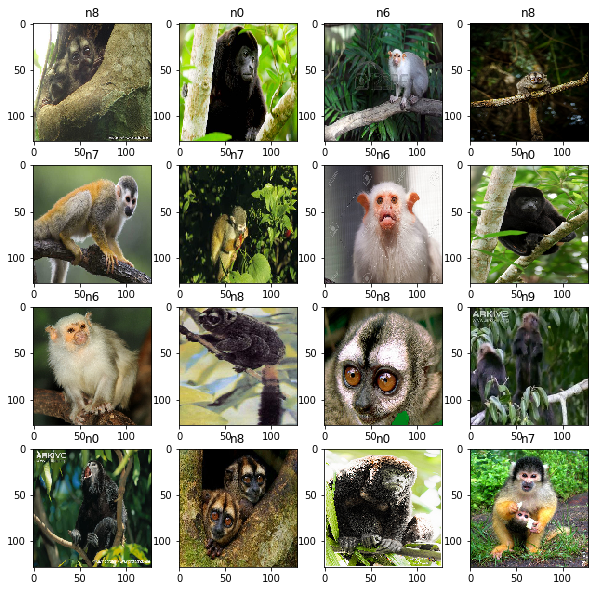

In [15]:
plt.figure(figsize = (10, 10))
l = np.random.randint(low = 500, size =(16)) 
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[l[i]])
    plt.title(df.label[l[i]])

In [16]:
datagen = image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [17]:
datagen.fit(x_train)

In [18]:
def create_model(x):
    reg = 1e-4
    model = models.Sequential()
    model.add(layers.Conv2D(32, input_shape = x.shape[1:], kernel_size = (3, 3), strides = (1, 1), padding = 'same',  kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))

    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.Conv2D(8, kernel_size = (3, 3), strides = (1, 1), padding = 'same' ,kernel_regularizer=regularizers.l2(reg)))
    model.add(layers.MaxPool2D( pool_size = (2, 2), padding = 'valid'))
    
    model.add(layers.Flatten())
    #model.add(layers.Dense(64, activation ='relu',kernel_regularizer=regularizers.l2(0.1)))
    model.add(layers.Dense(10, activation ='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
    

In [19]:
#model = create_model(x_train)

In [20]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = models.model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Loaded model from disk


In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        4624      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0

In [23]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

272/272 [==============================] - 1s 4ms/sample - loss: 0.9960 - acc: 0.6838


[0.9959661609986249, 0.6838235]

In [24]:
batch_size = 32

In [25]:
#model.fit(x_train, y_train, batch_size = batch_size, epochs = 10)

In [26]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=5)
                    

Epoch 1/5
35/34 [==============================] - 14s 412ms/step - loss: 1.1721 - acc: 0.5907
Epoch 2/5
35/34 [==============================] - 12s 341ms/step - loss: 1.0953 - acc: 0.6345
Epoch 3/5
35/34 [==============================] - 11s 304ms/step - loss: 1.0745 - acc: 0.6272
Epoch 4/5
35/34 [==============================] - 15s 437ms/step - loss: 1.0705 - acc: 0.6272
Epoch 5/5
35/34 [==============================] - 11s 325ms/step - loss: 1.0628 - acc: 0.6463


In [27]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

272/272 [==============================] - 1s 3ms/sample - loss: 0.9881 - acc: 0.7059


[0.9881497726720923, 0.7058824]

In [28]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [29]:
ls

LogisticRegression.ipynb  TFintro.py                model.h5
Neuralnet.ipynb           convnets.ipynb            model.json
README.md                 datasets/
TFintro.ipynb             linearnp.ipynb
